# Exercise 10: Using GDAL (the Geospatial Data Abstraction Library) to load and process raster image data

In today's class we're going to learn about the Python interface to GDAL (the Geospatial Data Abstraction Library): https://www.gdal.org. You can find more information on the Python GDAL package here: https://pypi.org/project/GDAL/.

GDAL is the workhorse of geospatial processing. Basically, GDAL offers a common library to access a vast number of formats (if you want to see how vast, check this out: https://gdal.org/formats_list.html). In addition to letting you open and convert obscure formats to something more useful, a lot of functionality in terms of processing raster data is available (for example, working with projections, combining datasets, accessing remote datasets, etc).

For vector data, the counterpart to GDAL is OGR (which is now a part of the GDAL library anyway), which also supports many vector formats. The combination of both libraries is a very powerful tool to work with geospatial data, not only from Python, but from many other popular computer languages.

In this session, we will introduce the gdal geospatial module which can read a wide range of raster scientific data formats. We will also introduce the related ogr vector package.

In pacticular, we will learn how to:
- load and read NASA geophysical datasets in HDF format (specifically, the MODIS LAI/FPAR product)
- read the metadata
- plot the raster data using matplotlib (as we have done before)
- analyse the differences between the data from two separate dates

Follow the instructions and type your answers in the code boxes with "# type your command here". There are also some questions to answer in the text boxes. A second jupyter notebook with the answers will be provided after the deadline.

Complete the whole assignment in this Jupyter Notebook and **upload it to Canvas by 11:59pm Monday 14th October**. There will be time in class on Moday to answer any questions you have about this exercise.

*Note: Part of this assignment has been adapted from Chapter 3 of UCL Geography's GEOG 0111 Scientific Computing course by Professor Philip Lewis and Dr. Jose Gomez-Dans. You can find out more from their GitHub coursepage here: https://github.com/jgomezdans/geog0111/tree/674b4030edb49fc893cba204912fac149d1fe538).*

### 1. MODIS LAI product
To introduce geospatial processing, we will use a dataset from the MODIS LAI product over the UK.

The data product MOD15 LAI/FPAR has been generated from NASA MODIS sensors Terra and Aqua data since 2002. We are now in dataset collection 6 (the data version to use).

*LAI is defined as the one-sided green leaf area per unit ground area in broadleaf canopies and as half the total needle surface area per unit ground area in coniferous canopies. FPAR is the fraction of photosynthetically active radiation (400-700 nm) absorbed by green vegetation. Both variables are used for calculating surface photosynthesis, evapotranspiration, and net primary production, which in turn are used to calculate terrestrial energy, carbon, water cycle processes, and biogeochemistry of vegetation. Algorithm refinements have improved quality of retrievals and consistency with field measurements over all biomes, with a focus on woody vegetation.*

You can find out more about this product here: https://modis.gsfc.nasa.gov/data/dataprod/mod15.php and https://lpdaac.usgs.gov/products/mcd15a2hv006/. You can also find out about other satellite products on the LP DAAC website: https://lpdaac.usgs.gov. 

We use such data to map and understand about the dynamics of terrestrial vegetation / carbon, for example, for climate studies.

These products are raster data (i.e. gridded data, with one value per grid cell). Satellite data typically cover the whole globe as they are orbiting the earth; therefore, the data output are arranged in tiles according to their projection (in this case - sinusoidal). These tiles are indexed by row and column, to cover the globe:

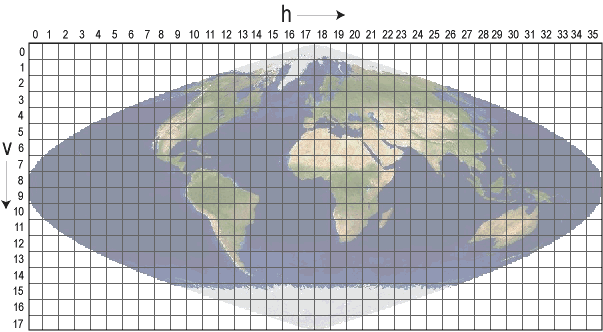

The pattern on the tile names is hXXvYY where XX is the horizontal coordinate and YY the vertical.

For example, for the two tiles covering Madegascar are 'h22v10' and 'h22v11'.

For this class I have downloaded the MODIS LAI/FAPAR product contained in HDF files for the tile that covers most of the UK: h17v03. I have downloaded the data for two dates:
- 2nd June 2018: 'MOD15A2H.A2018153.h17v03.006.2018162045300.hdf'
- 3rd December 2018: 'MOD15A2H.A2018337.h17v03.006.2018348144646.hdf'

Here is a quick jpeg image of the two LAI datasets contained in these files:

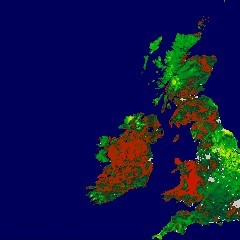 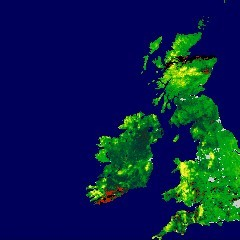

The data were downloaded from the USGS Earth Explorer website: https://earthexplorer.usgs.gov/

*Note: if you want to use satellite imagery for your project there are a number of different tools and websites for doing so. We can discuss this together before you start your final projects.*

### 2. Loading raster data using GDAL
To import gdal, we simply type the command 

**import gdal**

Type this in the box below and run the code:

In [49]:
# type your commands here

The two hdf files we will be working with are listed above. To open the hdf file we use the command:

**hdf_ds = gdal.Open(hdf_filename)**

where hdf_filename is the name of the file. This loads the all the data contained in the HDF file into a dataset. We can then get the subsets (i.e. all the different datasets) that are contained within this file ysing the command:

**hdf_subds = hdf_ds.GetSubDatasets()**

Create two string variables that contain the HDF filename corresponding to the two different dates. In the box below first open the file *just* for the first date (2nd June 2018) and get the subdatasets for that file. Print out the hdf_subds below and its type. You can also query the subdatasets using ? as we have done before. To improve your code, write a comment before each line of code explaining what the code is doing. *(NOTE: you will need to comment all your code in your final project)*.

In [51]:
# type your commands here

You should have printed out a big list containing all the different subdatasets in the HDF file. We can see that the 1st dataset is the 500m FPAR data, and the 2nd subdataset is the 500m LAI data. Save hdf_subds[1][0] to a variable so we can access it later (for example you may call this variable "lai_june_ds_name"). Print this variable to see the subdataset name for just the LAI data in the box below:

In [53]:
# type your commands here

Now we want to open this sepecific subdataset of the HDF file containing just the 500m LAI raster data. We do this using the gdal.Open command again, but instead of including the hdf_file in the brackets we use the dataset_name, e.g.

**g = gdal.Open(dataset_name)**

where dataset_name is the name you've given the string variable containing the subdataset name for the LAI (hdf_subds[1,0])

Now to actually read the data now we know which dataset we want to look at, we use the command

**data = g.ReadAsArray()**

In the box below, open the dataset, read the array of LAI data for 2nd June 2018. Then print out the type of the data array and the minimum and maximum value:

In [55]:
# type your commands here

We can also see information on its projection using the command:

**proj = g.GetProjection()**

Type this command and then print the resultant projection information and answer the following question:

- What is the projection of these data?

In [ ]:
# type your commands here

Finally, we can explore the metadata. To find out what type of metadata are contained with these LAI data, type the command: 

**metadata = g.GetMetadata().keys()**

Loop over these keys in the box below and print out each one:

In [ ]:
# type your commands here

As we have seen, the GetMetadata() command returns a dictionary. Dictionaries contain key value pairs. You have just printed out all the keys of this directory. Now find the values of both the "valid_range" and "scale_factor" keys in the box below. Save them to variables with the same name and print the values and type of each of these variables out. If you can't remember how to use the key name to access the value, go back over the dictionaries chapter of the DataCamp Introduction to Python course.

In [ ]:
# type your commands here

The scale_factor key is there to scale the data. We have seen from the valid range that the values go from 0 to 100. But LAI does not go up to values of 100. Values up to around 8 to 10 are possible, but not much higher. That's why the dataset has the scale factor. The reason the data are stored in values that are ten times higher than their actual value is that they can be stored as integers, which take up less space than floating point numbers. They then give the scale factor in the metadata, and we know (from reading the associated information) that we need to then multiply the LAI data by the scale factor. Do this in the box below:

In [ ]:
# type your commands here

Now we can plot the data. Import matplotlib as you normally do, set up the figure with a figsize=(10,10), and use plot.imshow() to plot the LAI data for the 2nd June 2018. plt.imshow takes the arguments vmin and vmax to set the range for the data --> set these to 0 and 6 respectively. Also set the cmap to be "gist_earth_r". Give the plot the title "MODIS LAI 2nd June 2018". This time instead of using plt.show(), save the figure using the following plot name by splitting the name of the original hdf file:

**plot_name = hdf_file.split('.hdf')[0] + '.png'**

Then use the command:

**plt.savefig(plot_name)**

to save the figure. Check in the directory you're working in to see if the file has saved. In the process, Jupyter Notebooks should also output the figure below. If it doesn't, type plt.show().

Type all these commands in the box below and run the code.

In [ ]:
# type your commands here

Now repeat all the above commands for the LAI data on 3rd December 2018, including opening the file, getting the subdatasets, getting the subdataset name for the LAI 500m product, reading the array, multiplying it by the scale factor and plotting the data with the new title of "MODIS LAI 3rd December 2018". IMPORTANT NOTE: save the data into a NEW variable. For example, before you may have called lai_june_data = g.ReadAsArray. Now use lai_dec_data. We want to access both the June and December datasets in the next step.

In [ ]:
# type your commands here

### 3. Simple change detection analysis comparing two images

The UK climate is pretty similar to the Indiana climate; therefore, the forested ecosystems are the same - they lose most of their leaves in the winter. We can see this broad pattern by comparing the plots above. However, if we want to detect more specific patterns of changes we can subtract the june lai data from the december lai data, i.e.: 

**delta_lai = lai_dec_data - lai_june_data**

First, answer the following questions:
1. Would you expect most values to be positive or negative, why?
2. What do negative values mean for the change in LAI between June and December? And vice versa for positive values?

Type the above line of code in the box below and then print the minimum and maximum of the data.

In [ ]:
# type your commands here

Now create a new figure with plt.imshow and this new delta_lai array in the box below. Instead of using 0 and 6 for the vmin and vmax, use the minimum and maximum values you have obtained above. We also need a colormap that can differentiate between negative and positive values more easily than the images we displayed and saved above. A good one to try is the 'RdBu' map - positive changes will be in blue and negative changes will be in red.

In [ ]:
# type your commands here

From this plot we can see more detailed patterns of where there has been an increase and a decrease in LAI between June and December 2018. Answer the questions below:

3. Which region has see the strongest decrease in LAI between June and December?
4. Which region have seen an increase in LAI?
5. Why do you think we might see an increase in LAI between June and December?

Now we have calculated the change between these two dates, we can start to do some analysis with this data. What type of analysis you might do might depend on your research question. One simple thing we can do is to count the number of points that are negative or positive. Using information about the size or area of each pixel, we could then convert this into an area of change. This might be particularly useful for assessing how much area was affected by a particular phenomenon, such as drought, wildfire, insect outbreak (for example). You would just have to confirm that the changes you see are *solely* due to the phenomenon you are investigating. 

We can count the number of pixels using the NumPy command:

np.count_nonzero(delta_lai>0)

for example where there has been a positive change.

Use these commands to calculate and print out how many pixels have a decrease in LAI, and how many have an increase in LAI between the two dates. 

In [ ]:
# type your commands here

GDAL can do many more sophisticated things such as re-projecting data and reading in vector information to mask, or select, just a subset of the data that you are interested in. Geopandas also has tools for using shapefiles to mask data and count. 

That's it, you have finished your last assignment. Upload your notebook to Canvas **by next Monday 14th October at 11:59pm.** There will be some time during class next Monday to answer any questions you have on this in-class exercise before you submit.